Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = ""

---

In [35]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 1:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object `f` and its approximation `F`.  Note, both `f` and `F` can be numpy arrays.

In [36]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    # YOUR CODE HERE
    
    # compute absolute errors
    e = numpy.abs(f - F)
    
    # compute relative errors
    r = e / numpy.abs(f)
    
    # compute precisions
    p = -numpy.log10(r/5.).astype(int)
    
    return e, r, p

In [37]:
# test simple scalars
e,r,p = errors(numpy.exp(1),2.72)
answer = [0.0017181715409551046, 0.0006320799863232398, 3]
numpy.testing.assert_allclose([e,r,p], answer)
print('passed scalar test')

# test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('passed array test')

passed scalar test
passed array test


**(b)** [4 pts] Use your routine to calculate various errors for several rational approximations to $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 314 / 100$
* $f = \pi$ and $F = 355 / 113$

Compare the most precise approximation to the least precise approximation.  How many more digits of precision do you gain?

In [38]:
# you can put some working code here to generate your answers, but put your answers in the cell below
p1 = errors(numpy.pi, 22/7)[2]
p2 = errors(numpy.pi, 314/100)[2]
p3 = errors(numpy.pi, 355/113)[2]
print(p1, p2, p3)

4 3 7


$ \text{We gain } 4 \text{ digits of precision}$

**(c)** [4 pts] $F = n \log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

**Note**: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  

**Hint**: However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

In [39]:
def stirling_approximatation(n):
    """"
    return n log(n) - n, which is Stirling's approximation of log(n!) for large values of n
    """
    
    return n * numpy.log(n) - n   

In [40]:
def log_n_factorial(n):
    """
    compute log(n!)
    """
    
    x = numpy.arange(2, n+1)
    return numpy.sum([numpy.log(val) for val in x])

In [41]:
def plot_approximation(n_values, relative_errors, precision_errors, n_val):
    """
    plot the relative error and precision of stirling's approximation as n increases
    n_val is the value of n we want to highlight
    """
    
    plt.title("Relative Error & Precision of Stirling's Approximation\n(Precision reaches 4 when n={})".format(n_val))
    plt.plot(n_values, relative_errors, label='relative error')
    plt.plot(n_values, precision_errors, '.', color='g', markersize='2', label='precision')
    plt.xlabel('n')
    plt.ylabel('relative error / precision')
    plt.legend()
    plt.show()

In [42]:
def get_data(lower_bound=2, upper_bound=2000):
    """
    compute the relative_error and precision error between Striling's apprximation
    and log(n!) for all values of n in between lower_bound and upper_bound.
    """
    
    # initialize values 
    n_values = numpy.arange(lower_bound, upper_bound)
    relative_errors = []
    precision_errors = []

    for n in n_values:

        # compute the true value and Stirling's approximatation value of log(n!)
        f = log_n_factorial(n) # true_value
        F = stirling_approximatation(n) # approximate_value

        # compute and record relative error and precision error
        _, r, p = errors(f,F)
        relative_errors.append(r)
        precision_errors.append(p)
        
    return relative_errors, precision_errors, n_values

In [43]:
def locate_n_value(precision_errors, n_values, target=4):
    """
    compute the first value of n where precision_error reaches the value specified by target
    """
    
    first_idx_to_hit_target = numpy.where(numpy.array(precision_errors) == target)[0][0]
    return  n_values[first_idx_to_hit_target]

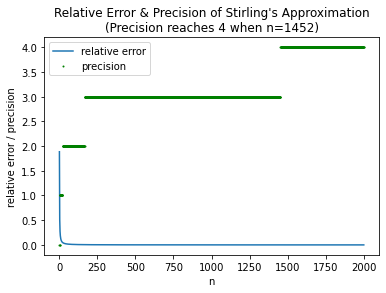

In [44]:
# YOUR CODE HERE

# get the relative error and precision between log(n!) and the
# Stirling approximation for all values of n in n_values
relative_errors, precision_errors, n_values = get_data()

# locate the value of n where we first hit four values of precision
n_val = locate_n_value(precision_errors, n_values)

# plot the relative errors and precision errors for different values of n
plot_approximation(n_values, relative_errors, precision_errors, n_val)

1452

## Question 2

[4 pts] Given the Taylor polynomial expansions of two functions around $x=0$

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

calculate their sum and product as well as the order of approximation for the truncation error (i.e. determine the exponent that belongs in the $O$).


$
\begin{align}
    \frac{1}{1- \Delta x}
    +
    cosh( \Delta x )
    &=
    2 + \Delta x + 1.5 ( \Delta x )^2 + (\Delta x )^3 + O((\Delta x)^4)
    \\
    \frac{cosh( \Delta x )}{1- \Delta x}
    &=
    (1 + \Delta x + (\Delta x)^2 + (\Delta x)^3)
    (1 + \frac{(\Delta x)^2}{2!} + \frac{(\Delta x)^4}{4!}) 
    +
    O((\Delta x)^4)
    \\
    &=
    \frac{3(\Delta x)^3}{2} + \frac{3(\Delta x)^2}{2} + 1
    +
    O((\Delta x)^4)
\end{align}
$

The order of approximation for the truncation error is 4 for both the sum and the product.

## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

Let the proof begin
$$
\begin{align}
    \frac{|e^x - T_n(x)|}{|e^x|}
    &=
    \frac{e^x - T_n(x)}{e^x} 
    && \text{because x > 0}
    \\
    &=
    \frac{R_n(x)}{e^x} 
    && \text{because } R_n(x) = f(x) - T_n(x) 
    \\
    &=
    \frac{e^c x^{n+1}}{e^x (n+1)!} 
    && \text{because } R_n(x) = \frac{f^{(n+1)}(c)(x-x_0)^{n+1}}{(n+1)!} 
    = \frac{e^c x^{n+1}}{(n+1)!}
    \text{ for } c \in [x_0, x]
    \\
    & \leq  \frac{e^x x^{n+1}}{e^x (n+1)!} 
    && \text{because } c \in [x_0, x] \implies x_0 \leq c \leq x \implies e^{x_0} \leq e^c \leq e^x
    \\
    & \leq \frac{x^{n+1}}{(n+1)!}
    \\
    \frac{|e^x - T_n(x)|}{|e^x|}
    & \leq | \frac{x^{n+1}}{(n+1)!} |
    && \text{because } x > 0 
    \\
\end{align}
$$



**(b)** [4 pts] Analytically show that for **large** $x\gg1$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need *approximately* $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$ (and then this problem is still a bit tricky)

$$
\begin{align}
    \epsilon_{machine}
    & \geq 
    | \frac{x^{n+1}}{(n+1)!} |
    \\
    \epsilon_{machine}
    & \geq
    \frac{x^{n+1}}{(n+1)!} 
    && \text{ because } x, n > 0
    \\
    \epsilon_{machine} (n+1)!
    & \geq x^{n+1}
    \\
    log( \epsilon_{machine} (n+1)!)
    & \geq log( x^{n+1} )
    \\
    log( \epsilon_{machine}) + (n+1) log(n+1) - (n+1)
    & \geq (n+1) log(x)
    && \text{ by Stirling's approximation}
    \\
    \frac{log( \epsilon_{machine})}{n+1} + log(n+1) - 1
    & \geq log(x)
    \\
    log(n+1)
    & \geq 1 + log(x) - \frac{log( \epsilon_{machine})}{n+1}
    \\
    n + 1
    & \geq ex \cdot e^{\frac{log( \epsilon_{machine})}{n+1}}
    \\
    n + 1
    & \geq ex 
    && \text{because } \epsilon_{machine} \text{ is so small, } 
    n \text{ is so big then } e^{\frac{log( \epsilon_{machine})}{n+1}} \approx 1
    \\
    n 
    & \geq ex - 1 
    \\
    n 
    & \geq ex
    && \text{because x is so big, we can drop the 1}
    \\
\end{align}
$$

**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [70]:
def horner(poly, n, x):
 
    result = poly[0] 
    for i in range(1, n):
        result = result*x + poly[i]
    return result

In [85]:
def Tn_exp(x):
    """ approximate e^x with Taylor's series. Use horner's method and the fact 
    that e^x = 1/e^|x| for x < 0 to optimize performence. 
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))

    # initial values
    # I had the issue that when x was small, n would not be large enough so I
    # created the threshold to garunetee that n will be large enough
    threshold = 50 if numpy.abs(x) < 50 else numpy.abs(x)
    MAX_N = int(numpy.ceil(numpy.exp(1) * threshold))
    is_negative = x < 0
    
    if is_negative:
        x = numpy.abs(x)
     
    coefficients = [1/factorial(n) for n in range(0, MAX_N)]
    coefficients.reverse()
    Tn = horner(coefficients, MAX_N, x)
        
    if is_negative:
        Tn = 1 / Tn
        
    return Tn, MAX_N

In [91]:
# #Feel free to test your code here and/or make a plot of errors

# # initial values
# x_values = numpy.arange(-50, 50)
# relative_errors = []
# precision_errors = []
# eps = numpy.finfo(float).eps

# for x in x_values:
    
#     F = Tn_exp(float(x))[0] # approximation
#     f = numpy.exp(x) # true value
    
#     _, r, p = errors(f,F)
#     relative_errors.append(r)
#     precision_errors.append(p)
    
#     print('x={}\te^x = {}\te^x~{}\tr={}'.format(x, f, F, r / eps))

    
# # plot the relative errors and precision errors for different values of n
# plot_approximation(x_values, relative_errors, precision_errors, 0)

In [89]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 4.252190255480811 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

In [90]:
# initial values
max_x = 709
eps = numpy.finfo(float).eps


# compute relative error in units of machine epsilon 
# for our Taylor series VS numpy
Tn = Tn_exp(float(max_x))[0]
ex = numpy.exp(max_x)
r = numpy.abs(Tn - ex) / numpy.abs(ex)
r_in_machine_epsilon = r / eps
print("{:5f} relative error in machine_epsilon between our Taylor series of e^709 and numpy's e^709".format(r_in_machine_epsilon))

# compute relative error in units of machine epsilon
# for our Taylor series VS python
F = numpy.exp(1)**max_x
f = numpy.exp(max_x)
r = numpy.abs(f - F) / numpy.abs(f)
r_in_machine_epsilon_2 = r / eps
print("{:5f} relative error in machine_epsilon between our Taylor series of e^709 and python's e^709".format(r_in_machine_epsilon_2))

4503599627370496.000000 relative error in machine_epsilon between our Taylor series of e^709 and numpy's e^709
170.070226 relative error in machine_epsilon between our Taylor series of e^709 and python's e^709


The relative error between our Taylor series approximation of $e^{709}$ and numpy's $e^{709}$ is $4503599627370496 \epsilon_{machine}$ while the relative error between python's $e^{709}$ and numpy's $e^{709}$ is around $170 \epsilon_{machine}$. Clearly, the python routine significantly outperforms our Taylor series routine. This likely comes from two places. First, the python routine may have some built in optimization which helps to make it faster than our Taylor series routine. Second, although we use Horner's method, we still have a bunch of multiplication errors that build up when computing the coeifficents of n! (convergence error). So as we compute n!, we can get errors from representing floats with finite precision, and issues that generally arise with multiplication.

**(e)**  **How low can you go?** [4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 20 $\epsilon_{machine}$?


In [92]:
def Tn_exp(x, tolerance=None):
    """ approximate e^x with Taylor's series. Use horner's method and the fact 
    that e^x = 1/e^|x| for x < 0 to optimize performence. 
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))

    # initial values
    # I had the issue that when x was small, n would not be large enough so I
    # created the threshold to garunetee that n will be large enough
    threshold = 100 if numpy.abs(x) < 100 else numpy.abs(x)
    MAX_N = int(numpy.ceil(numpy.exp(1) * threshold))
    Tn = 1
    is_negative = x < 0
    
    if is_negative:
        x = numpy.abs(x)
     
    # define range
    range_ = list(range(1, MAX_N))
    range_.reverse()
    
    # use horner's method to compute taylor series
    for n in range_:
        Tn = 1 + x/n * Tn
        
    if is_negative:
        Tn = 1 / Tn
        
    return Tn, MAX_N

In [93]:
x = numpy.linspace(-709, 709, 101)
tolerance = 20 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 18.978686562895863 eps_machine
Success!


## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$.

**(a)** [4 pts] Calculate how many numbers can we represent with this system?  What are the underflow and overflow limits?

We can represent $2 * 3 * 4 * 4 * 7 + 1 =673$ different numbers with this system.


Underflow: $1.00 * 4^{-3}$ in base 4 is $1 * \frac{1}{64}$ in base 10, equaling 0.015625, which with rounding is 0.016 in base 10.


Oveflow: $3.33 * 4^{3}$ in base 4 is $ ( 3 + \frac{3}{4} + \frac{3}{16} ) * 64$ in base 10, equaling 252 in base 10.


**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

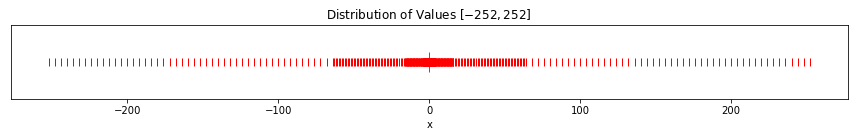

In [62]:
base = 4

fig = plt.figure(figsize=(15.0,3.0))
axes = fig.add_subplot(2, 1, 1)

axes.plot(0.0, 0.0, '|', markersize=20)
axes.set_title("Distribution of Values $[-252, 252]$")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")

for exponent in range(-3, 3+1):
    for d1 in range(1, 4):
        for d2 in range(4):
            for d3 in range(4):
                val = d1 + d2 * base ** -1 + d3 * base ** -2
                axes.plot( val * base**exponent, 0.0, 'r|', markersize=8)
                axes.plot(-val * base**exponent, 0.0, 'r|', markersize=8)
                

plt.show()

**(c)** [4 pts] How many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g.  p=3, and $E\in[-3,3]$ for both problems)?

Generally if $p \geq 2$, then the number of different digits we have in a system with base $\beta$, set of exponents $E$, and precision $p$ is $2 * (\beta - 1) * \beta^{p-1}* |E| + 1$. So with $p=3, E \in [-3, 3]$, then we know in base 2 we have 57 possible different numbers and in base 4 we have 673 different numbers. So if we have N base-pairs and N bits, then we can represent $673N-57N=616N$ more numbers using base 4 than base 2.

More generally, for base 4 ($\beta=4$), the number of digits that we have $D_4$, is 
$$D_4 = 6 * 4^{p-1} |E| + 1$$
and for base 2 ($\beta = 2$), the number of digits that we have $D_2$, is
$$ D_2 = 2 |E| + 1$$
So if we have N numbers of base 4 and N numbers of base 2, then we can represent $N \cdot D_4$ numbers with base 4 and $N \cdot D_2$ numbers with base 2. The difference between these is:
$$
N D_4 - N D_2 = N(D_4 - D_2) = N (6 * 4^{p-1} |E| + 1 - 2 |E| - 1 ) = 2 N |E| (3 * 4^{p-1} - 1)
$$
so if we have n numbers, then we will be able to represent $2 N |E| (3 * 4^{p-1} - 1)$ more numbers in base 4 than in base 2.